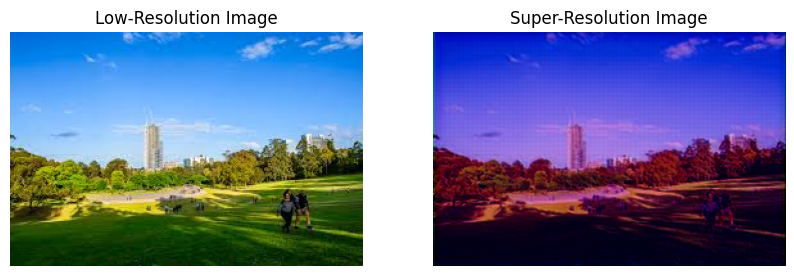

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Load pre-trained ESRGAN model from TensorFlow Hub
model = hub.load("https://tfhub.dev/captain-pool/esrgan-tf2/1")

# Load and preprocess the low-resolution image
def load_image(image_path):
    image = Image.open(image_path)
    image = image.convert("RGB")
    image = np.array(image).astype(np.float32) / 255.0  # Normalize
    return np.expand_dims(image, axis=0)  # Add batch dimension

# Display images
def show_images(lr_image, sr_image):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(lr_image.squeeze())
    axs[0].set_title("Low-Resolution Image")
    axs[0].axis("off")

    axs[1].imshow(sr_image.squeeze())
    axs[1].set_title("Super-Resolution Image")
    axs[1].axis("off")

    plt.show()

# Load image
lr_image = load_image("/content/park.jpeg")  # Replace with your image path

# Apply Super-Resolution
sr_image = model(lr_image)
sr_image = np.clip(sr_image.numpy(), 0, 1)  # Ensure valid pixel range

# Show results
show_images(lr_image, sr_image)
